# Boxplots

(c) 2023-2024 Nick Falk, Rob Edwards

These boxplots are based on Nick's boxplot data, but this uses the "new" format taxonomy data that is the same for MGI and MinION


In [7]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [8]:
df = pd.read_csv("../MGI/Taxonomy/MGI_reads_genus.normalised.tsv.gz", sep='\t', compression='gzip')
df = df[df['taxonomy'].str.contains('k__Bacteria')]
df = df[~df['taxonomy'].str.endswith('g__')]
genus_otu = df.set_index('taxonomy')
genus_otu.index = genus_otu.index.str.split(';').str[-1]
genus_otu.head()

,768745_20190228_BAL,698917_20180329_S,788707_20171213_S,698917_20171207_S,896213_20180427_S,825012_20181113_S,777599_20180306_S,877469_20190115_S,825012_20171129_S,1162967_20180116_S,...,752797_20170918_S,748699_20190114_S,676138_20171001_S,1465461_20180406_S,753522_20180606_S,1112926_20171212_S,788707_20180313_S,720054_20171120_S,701099_20180517_S,1593973_20180504_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
g__Candidatus Aegiribacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
g__Candidatus Kapaibacterium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
g__Candidatus Stahlbacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.854966,0.221969,0.0,0.0,0.000000,0.0,0.0
g__Vermiphilus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.035557,0.0,0.0
g__Candidatus Babela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [9]:
# Normalization/Transformation
# Square root transform
sqrt_genus = np.sqrt(genus_otu)

# Transpose the taxa table
genus_otu2 = sqrt_genus.T
genus_otu2.head()

taxonomy,g__Candidatus Aegiribacteria,g__Candidatus Kapaibacterium,g__Candidatus Stahlbacteria,g__Vermiphilus,g__Candidatus Babela,g__Candidatus Chromulinivorax,g__Candidatus Ozemobacter,g__Candidatus Desulfacyla,g__Dissulfurimicrobium,g__Dissulfurirhabdus,...,g__Oceaniferula,g__Persicirhabdus,g__Phragmitibacter,g__Prosthecobacter,g__Roseibacillus,g__Roseimicrobium,g__Sulfuriroseicoccus,g__Verrucomicrobium,g__Candidatus Eremiobacter,g__Candidatus Methylomirabilis
768745_20190228_BAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
698917_20180329_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
788707_20171213_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
698917_20171207_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
896213_20180427_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.997506,0.0,0.0


In [10]:
# Load metadata table
# This is generic so we can copy/paste. Yes, it should be a function, but its not.

#sequence_type = 'minion_ID'
sequence_type = 'MGI_ID'

metadata = pd.read_csv("../Metadata/CF_Metadata_Table-JCJ-OD-v-2023-03-23-1352.tsv.gz", encoding='utf-8', sep="\t", compression='gzip', index_col=0)
metadata = metadata[~metadata[sequence_type].isna()]
todrop = []
for s in metadata[sequence_type]:
    if s not in genus_otu2.index:
        print(f"ERROR: {s} not found in data frame, dropped from metadata", file=sys.stderr)
        todrop.append(s)

metadata.drop(todrop, inplace=True)

todrop = []
for s in genus_otu2.index:
    if not metadata[sequence_type].str.contains(s).any():
        print(f"ERROR: {s} not found in metadata, dropped from dataframe", file=sys.stderr)
        todrop.append(s)
genus_otu2.drop(todrop, inplace=True)
        
if metadata.shape[0] != genus_otu2.shape[0]:
    print(f"ERROR: we have {metadata.shape[0]} rows in metadata and {genus_otu2.shape[0]} data rows", file=sys.stderr)
metadata.head()

ERROR: 768745_20190228_BAL not found in metadata, dropped from dataframe


,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,3 Omalizumab_SC,"3 piperacillin sodium, tazobactam sodium (Tazocin)_IV",2 prednisolone_PO,1 Sulfamethoxazole – trimethoprim (Bactrim)_PO,3 tobramycin_IV,2 tobramycin_INH,Sum of antibiotics,Sum of meds,Sum of antifungals,Sum of steroid + mabs
unique_ID,,,,,,,,,,,,,,,,,,,,,
623361_20180123_S,623361_20180123_S,623361_20180123_S,0,0,623361,2018-01-23T00:00:00Z,OP,RAH,Chest Clinic 9,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634207_20180510_S,NaN,634207_20180510_S,0,0,634207,2018-05-10T00:00:00Z,IP,WCH,Adol Rm9,17,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
634207_20180517_S,NaN,634207_20180517_S,0,0,634207,2018-05-17T00:00:00Z,IP,WCH,Adol Rm9,17,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
639354_20171206_S,639354_20171206_S,639354_20171206_S,0,0,639354,2017-12-06T00:00:00Z,IP,WCH,Adolescent 10,17,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
642660_20180601_S,642660_20180601_S,642660_20180601_S,0,0,642660,2018-06-01T00:00:00Z,IP,WCH,Adol Rm 11,17,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0


In [11]:
# Merge the taxa table and metadata table by the shared row names
merged1 = pd.merge(metadata, genus_otu2, left_index=True, right_index=True)
merged1.head()

,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,g__Oceaniferula,g__Persicirhabdus,g__Phragmitibacter,g__Prosthecobacter,g__Roseibacillus,g__Roseimicrobium,g__Sulfuriroseicoccus,g__Verrucomicrobium,g__Candidatus Eremiobacter,g__Candidatus Methylomirabilis
623361_20180123_S,623361_20180123_S,623361_20180123_S,0,0,623361,2018-01-23T00:00:00Z,OP,RAH,Chest Clinic 9,18,...,0.000000,0.0,0.0,0.000000,1.373828,0.0,0.0,0.686914,0.000000,0.971443
634207_20180510_S,NaN,634207_20180510_S,0,0,634207,2018-05-10T00:00:00Z,IP,WCH,Adol Rm9,17,...,0.000000,0.0,0.0,0.831879,0.960571,0.0,0.0,1.073951,0.679226,0.679226
634207_20180517_S,NaN,634207_20180517_S,0,0,634207,2018-05-17T00:00:00Z,IP,WCH,Adol Rm9,17,...,1.247199,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.394411
639354_20171206_S,639354_20171206_S,639354_20171206_S,0,0,639354,2017-12-06T00:00:00Z,IP,WCH,Adolescent 10,17,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
642660_20180601_S,642660_20180601_S,642660_20180601_S,0,0,642660,2018-06-01T00:00:00Z,IP,WCH,Adol Rm 11,17,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.847012,0.000000


In [12]:
# Define the culturing
culture_columns = [
    'CS_Pseudomonas aeruginosa',
    'CS_Stenophotomonas maltophilia',
    'NTM',
    'CS_Mycobacteroides abscessus',
    'CS_Mycobacterium intracellulare',
    'CS_Staphylococcus  aureus',
    'CS_Achromobacter xylosoxidans',
    'CS_Burkholderia cepacia',
    'CS_Haemophilus influenzae'
]

culture_pairs = {
    'CS_Pseudomonas aeruginosa' : 'g__Pseudomonas',
    'CS_Stenophotomonas maltophilia': 'g__Stenotrophomonas',
    'NTM' : 'g__Mycobacterium',
    'CS_Mycobacteroides abscessus' : 'g__Mycobacteroides',
    'CS_Mycobacterium intracellulare' : 'g__Mycobacterium',
    'CS_Staphylococcus  aureus' : 'g__Staphylococcus',
    'CS_Achromobacter xylosoxidans' : 'g__Achromobacter',
    'CS_Burkholderia cepacia' : 'g__Burkholderia',
    'CS_Haemophilus influenzae' : 'g__Haemophilus'
}



In [13]:
# Step 2: Create Boxplots
def create_boxplot(data, culture_taxa, taxa):
    subset_data = data[data[culture_taxa].notna()]
    plt.figure(figsize=(10, 6))
    # sns.boxplot(x=culture_taxa, y=taxa, data=subset_data, color='black', boxprops=dict(facecolor='white'))
    sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, legend=False)
    sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, legend=False)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("Abundance in Patient")
    plt.xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
    plt.grid(False)
    plt.tight_layout()
    plt.show()

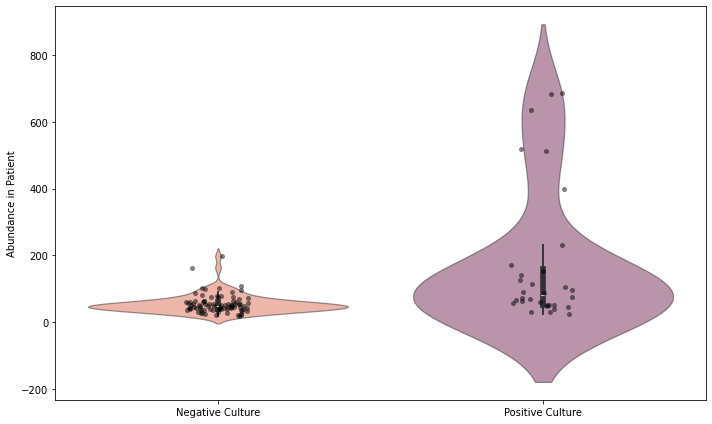

In [14]:
# Example usage
create_boxplot(merged1, "CS_Pseudomonas aeruginosa", "g__Pseudomonas")

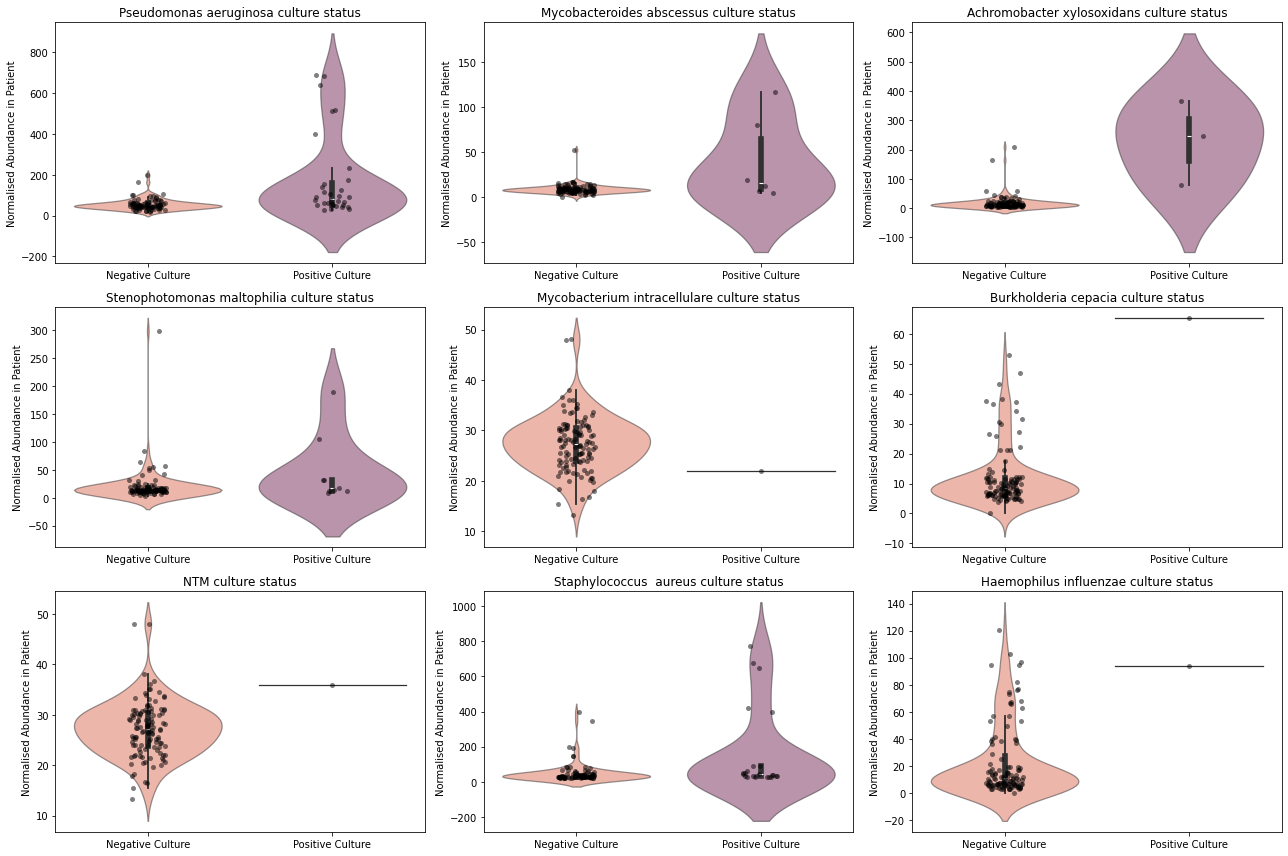

In [18]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=3, ncols=3, sharex=False, sharey=False)

k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        culture_taxa = culture_columns[k]
        taxa = culture_pairs[culture_taxa]
        subset_data = merged1[merged1[culture_taxa].notna()]
        g = sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, ax=ax[j][i], legend=False)
        g = sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel("Normalised Abundance in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(f"{culture_taxa.replace('CS_', '')} culture status")
        k+=1
        

plt.tight_layout()
plt.show()

In [16]:
# Step 3: Additionally Stats Tests
# Perform Kruskal-Wallis Test
kruskal_stat, p_value = stats.kruskal(
    merged1.loc[merged1['CS_Pseudomonas aeruginosa'] == 0.0, 'g__Pseudomonas'],
    merged1.loc[merged1['CS_Pseudomonas aeruginosa'] == 1.0, 'g__Pseudomonas']
)
print(f'Kruskal-Wallis Test statistic: {kruskal_stat}, p-value: {p_value}')

Kruskal-Wallis Test statistic: 17.333485958485937, p-value: 3.136116265347408e-05


In [17]:
# Calculate median
g__CS_Pseudomonas_aeruginosa_median = merged1.groupby('CS_Pseudomonas aeruginosa', observed=True)['g__Pseudomonas'].median()
print(g__CS_Pseudomonas_aeruginosa_median)

CS_Pseudomonas aeruginosa
0.0    49.891003
1.0    81.544101
Name: g__Pseudomonas, dtype: float64


In [21]:
# Filter to get the threshold value for hits in the "0" grouping
threshold_CS_Pseudomonas_aeruginosa = g__CS_Pseudomonas_aeruginosa_median.loc[1]
print(threshold_CS_Pseudomonas_aeruginosa)

81.54410067902238


In [23]:
# Find row names where the value is above the threshold
above_threshold_rownames_CS_Pseudomonas_aeruginosa = merged1[
    (merged1['CS_Pseudomonas aeruginosa'] == 0) &
    (merged1['g__Pseudomonas'] > threshold_CS_Pseudomonas_aeruginosa)
].index.tolist()
# Print the row names
print(above_threshold_rownames_CS_Pseudomonas_aeruginosa)

['676138_20171001_S', '698564_20180215_S', '698917_20171207_S', '698917_20180119_S', '698917_20180329_S', '752797_20170918_S', '770560_20190109_S', '825012_20181120_S', '877469_20190115_S', '1651490_20171010_S']


In [24]:
# Save results to CSV
pd.DataFrame(above_threshold_rownames_CS_Pseudomonas_aeruginosa).to_csv("CS_Pseudomonas.aeruginosa.csv", index=False)

In [25]:
# Run pairwise Wilcoxon test on groups within a column


results = stats.wilcoxon(
    merged1['g__Pseudomonas'][merged1['CS_Pseudomonas aeruginosa'] == 0],
    merged1['g__Pseudomonas'][merged1['CS_Pseudomonas aeruginosa'] == 1]
)

p_adj = multipletests([results.pvalue], method='fdr_bh')[1][0]
print(f'Adjusted p-value for pairwise test: {p_adj}')


ValueError: The samples x and y must have the same length.

In [26]:
merged1['g__Pseudomonas'][merged1['CS_Pseudomonas aeruginosa'] == 0].shape

(84,)

In [27]:
merged1['g__Pseudomonas'][merged1['CS_Pseudomonas aeruginosa'] == 1].shape

(32,)